# <span style="color: #2E86C1;">Project Overview: Language Detection using Naive Bayes</span>

This project focuses on classifying text data into different languages using a Naive Bayes classifier. The main steps include data loading, exploratory data analysis (EDA), data preprocessing, model training, and evaluation.

## <span style="color: #2980B9;">1. Import Libraries</span>
We start by importing the necessary libraries for data manipulation, visualization, model training, and evaluation. This includes libraries such as pandas, seaborn, matplotlib, and scikit-learn.

## <span style="color: #2980B9;">2. Load the Dataset</span>
The dataset is loaded into a pandas DataFrame for further analysis. It is crucial to define the correct path to ensure that the data is accessible.

## <span style="color: #2980B9;">3. Inspect the Dataset</span>
We conduct an initial inspection of the dataset by checking:
- The first few rows to understand its structure
- The data types of each column
- Summary statistics to gain insights into the data distribution
- Missing values for data cleaning purposes

## <span style="color: #2980B9;">4. Exploratory Data Analysis (EDA)</span>
EDA is performed to visualize various aspects of the data, including:
- Language distribution using pie charts
- Text length analysis through box plots, violin plots, histograms, and line plots
- Categorization of text lengths for better insights

## <span style="color: #2980B9;">5. Data Preprocessing</span>
The data preprocessing steps include:
- Splitting the dataset into features (Text) and labels (language)
- Encoding the labels for classification
- Dividing the dataset into training and testing sets
- Vectorizing the text data using the CountVectorizer to prepare it for model training

## <span style="color: #2980B9;">6. Model Training</span>
We initialize and train a Multinomial Naive Bayes classifier on the training data. The trained model is then saved for future use.

## <span style="color: #2980B9;">7. Model Evaluation</span>
The model is evaluated using the test set, where we calculate:
- Accuracy of the model predictions
- A classification report providing detailed metrics
- A confusion matrix visualizing the performance of the model

## <span style="color: #2980B9;">8. Conclusion</span>
The project concludes with a summary of the model training and evaluation, highlighting the effectiveness of the Naive Bayes classifier in classifying text data into different languages.

---

This project serves as a comprehensive guide for anyone interested in text classification tasks using machine learning techniques.

## <span style="color:green;">Step 1: Import Libraries</span>
In this step, we import the necessary libraries for our project. These libraries are crucial for various functions including data manipulation, visualization, model training, and evaluation.

- **Pandas**: A powerful data manipulation library that allows us to read and handle datasets efficiently.
- **Seaborn & Matplotlib**: Visualization libraries that enable us to create informative and attractive graphs for exploratory data analysis (EDA).
- **Scikit-learn**: A machine learning library that provides tools for model training, evaluation, and various preprocessing techniques.
- **Joblib**: Used for saving and loading machine learning models and other objects efficiently.

In [15]:
# ===========================

In [16]:
# Import Libraries

In [17]:
# ===========================

In [18]:
import pandas as pd  # Importing pandas for data manipulation

In [19]:
import seaborn as sns  # Importing seaborn for data visualization

In [20]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

In [21]:
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data

In [22]:
from sklearn.feature_extraction.text import CountVectorizer  # Importing CountVectorizer for text feature extraction


In [23]:
from sklearn.naive_bayes import MultinomialNB  # Importing Multinomial Naive Bayes for classification

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Importing metrics for evaluation


In [25]:
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder for label encoding

In [26]:
import joblib  # Importing joblib for saving models

## <span style="color:green;">Step 2: Load the Dataset</span>
Here, we define the path to our dataset and load it into a Pandas DataFrame. This step is essential for accessing our data for subsequent analysis and modeling.

- **Dataset Path**: Specify the path where the dataset is located.
- **Loading Data**: Utilize `pd.read_csv()` to read the dataset into a DataFrame for easy manipulation.

In [27]:
# ===========================

In [28]:
# Load the Dataset

In [29]:
# ===========================

In [30]:
dataset_path = '/content/dataset.csv'  # Defining the path for the dataset

In [31]:
df = pd.read_csv(dataset_path)  # Loading the dataset into a DataFrame

## <span style="color:green;">Step 3: Inspect the Dataset</span>
We perform an initial inspection of the dataset to understand its structure and contents.

- **Display First Rows**: Use `df.head()` to show the first few entries of the dataset.
- **Data Types**: Check the types of data in each column using `df.dtypes`.
- **Summary Statistics**: Use `df.describe()` to get an overview of the numerical features.
- **Missing Values**: Identify any missing values in the dataset using `df.isnull().sum()` to ensure data integrity.

In [32]:
# ===========================

In [33]:
# Inspect the Dataset

In [34]:
# ===========================

In [35]:
print("First few rows of the dataset:")  # Printing a message before showing the dataset
print(df.head())  # Displaying the first few rows of the dataset

First few rows of the dataset:
                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [36]:
print("\nColumn names and data types:")  # Printing a message before displaying data types
print(df.dtypes)  # Displaying column names and their data types


Column names and data types:
Text        object
language    object
dtype: object


In [37]:
print("\nSummary statistics:")  # Printing a message before showing summary statistics
print(df.describe(include='all'))  # Displaying summary statistics for all columns


Summary statistics:
                                                     Text  language
count                                               22000     22000
unique                                              21859        22
top     haec commentatio automatice praeparata res ast...  Estonian
freq                                                   48      1000


In [43]:
# Checking for duplicates

In [44]:
duplicate_count = df.duplicated().sum()  # Counting the number of duplicate rows

In [45]:
print(f"Number of duplicate rows: {duplicate_count}")  # Displaying the count of duplicate rows

Number of duplicate rows: 141


In [46]:
# Unique values in each column

In [47]:
unique_values = df.nunique()  # Counting unique values for each column

In [48]:
print(unique_values)  # Displaying the unique values count for each column

Text        21859
language       22
dtype: int64


In [49]:
# Checking for missing values

In [50]:
missing_values = df.isnull().sum()  # Summing up the missing values in each column

In [51]:
missing_values = missing_values[missing_values > 0]  # Filtering columns with missing values

In [52]:
print(missing_values)  # Displaying the columns with missing values

Series([], dtype: int64)


In [53]:
# Value counts for a specific categorical column (e.g., 'language')

In [54]:
language_counts = df['language'].value_counts()  # Counting occurrences of each category in 'language'

In [55]:
print(language_counts)  # Displaying the value counts for 'language'

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64


In [56]:
# Inspecting correlations

In [57]:
numerical_cols = df.select_dtypes(include='number')  # Selecting only numeric columns

In [58]:
correlation_matrix = numerical_cols.corr()  # Calculating the correlation matrix for numerical columns

In [59]:
print(correlation_matrix)  # Displaying the correlation matrix

Empty DataFrame
Columns: []
Index: []


## <span style="color:green;">Step 4: Exploratory Data Analysis (EDA)</span>
Exploratory Data Analysis is conducted to uncover patterns and insights from the dataset.

- **Text Length Analysis**: A new column `text_length` is created to store the length of each text entry.
- **Visualization**: We generate various plots (pie charts, box plots, violin plots, histograms) to visualize language distribution and text length characteristics. These visualizations help identify trends and distributions within the data.

In [60]:
# ===========================

In [61]:
# Exploratory Data Analysis (EDA)

In [62]:
# ===========================

In [63]:
df['text_length'] = df['Text'].apply(len)  # Creating a new column for text length

In [64]:
# Pie Chart for distribution of languages in the dataset

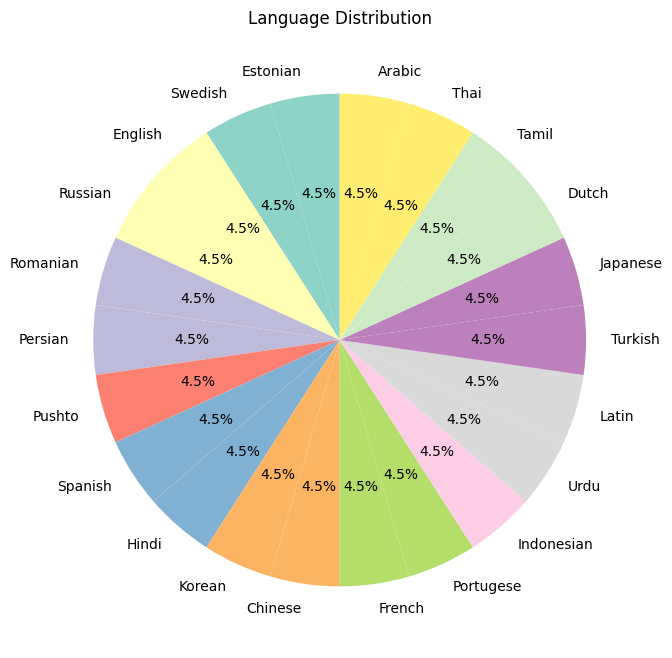

In [65]:
plt.figure(figsize=(8, 8))  # Setting the figure size for the pie chart
df['language'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')  # Plotting pie chart for language distribution
plt.title('Language Distribution')  # Setting the title for the pie chart
plt.ylabel('')  # Hiding y-axis label
plt.savefig('/content/language_pie_chart.png')  # Saving the pie chart as an image
plt.show()  # Displaying the pie chart

In [66]:
# Box plot for text length by language

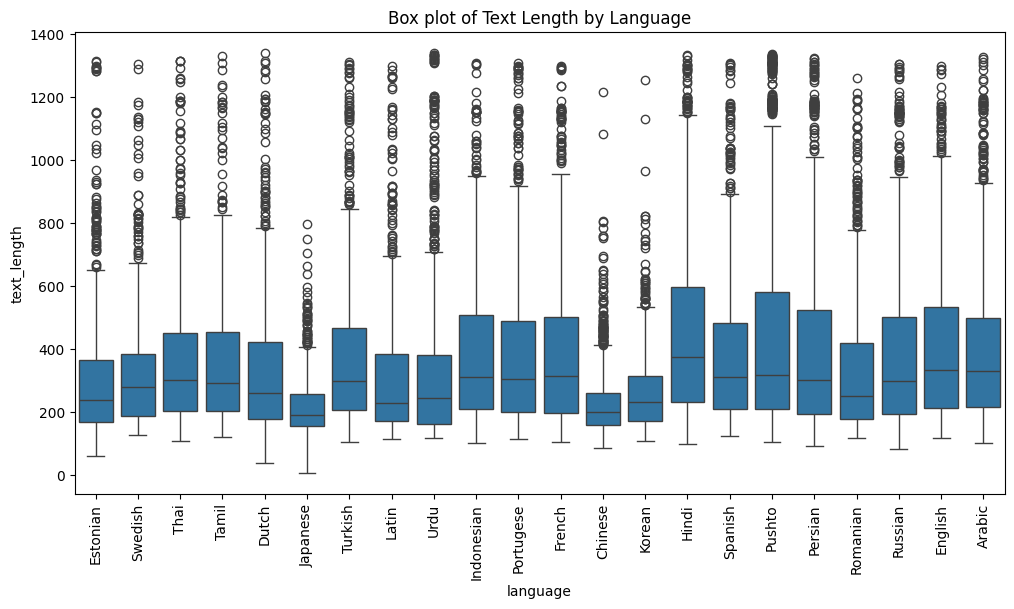

In [67]:
plt.figure(figsize=(12, 6))  # Setting the figure size for the box plot
sns.boxplot(x='language', y='text_length', data=df)  # Creating a box plot for text length by language
plt.title('Box plot of Text Length by Language')  # Setting the title for the box plot
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.savefig('/content/text_length_boxplot.png')  # Saving the box plot as an image
plt.show()  # Displaying the box plot

In [68]:
# Violin plot for text length by language

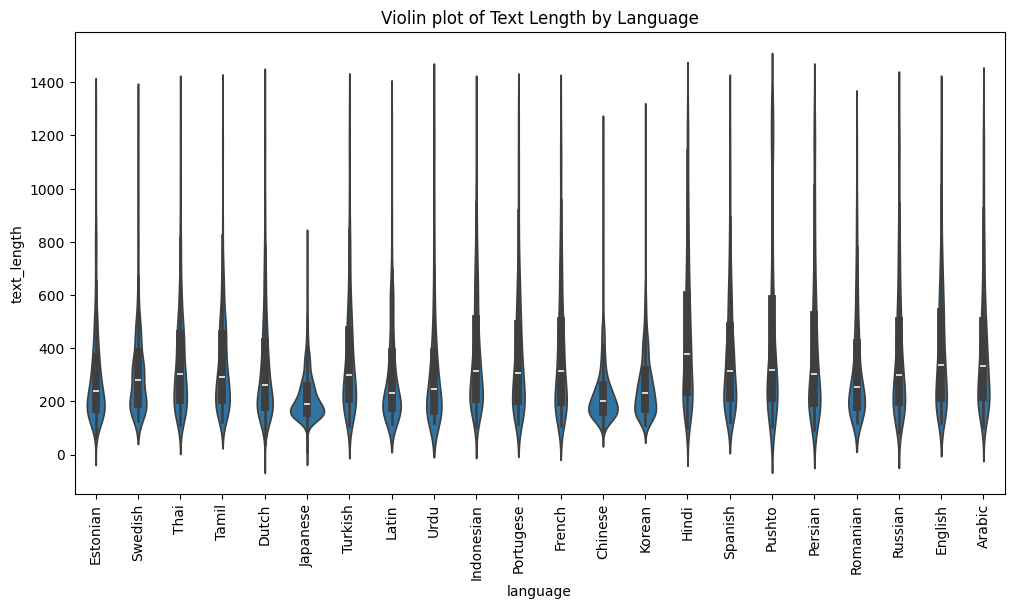

In [69]:
plt.figure(figsize=(12, 6))  # Setting the figure size for the violin plot
sns.violinplot(x='language', y='text_length', data=df)  # Creating a violin plot for text length by language
plt.title('Violin plot of Text Length by Language')  # Setting the title for the violin plot
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.savefig('/content/text_length_violinplot.png')  # Saving the violin plot as an image
plt.show()  # Displaying the violin plot

In [70]:
# Histogram of text lengths

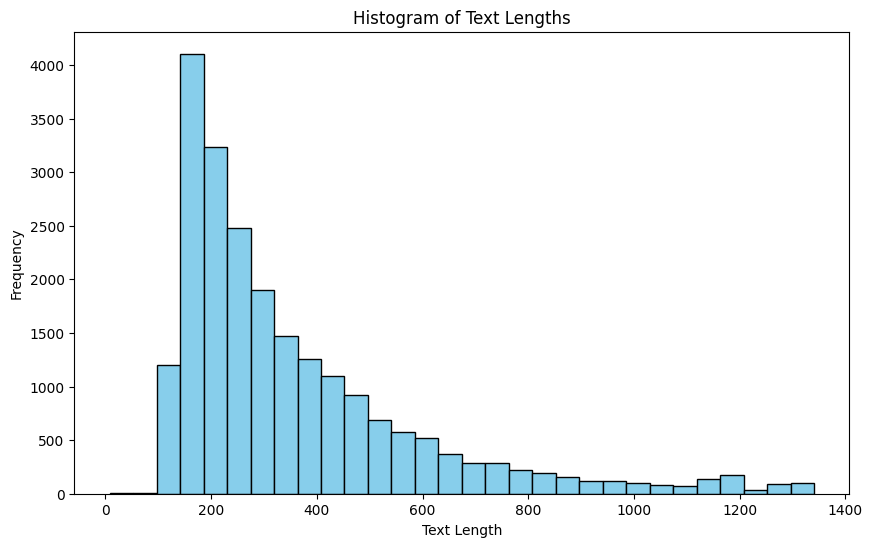

In [71]:
plt.figure(figsize=(10, 6))  # Setting the figure size for the histogram
df['text_length'].plot.hist(bins=30, edgecolor='black', color='skyblue')  # Creating a histogram of text lengths
plt.title('Histogram of Text Lengths')  # Setting the title for the histogram
plt.xlabel('Text Length')  # Setting the x-axis label
plt.ylabel('Frequency')  # Setting the y-axis label
plt.savefig('/content/text_length_histogram.png')  # Saving the histogram as an image
plt.show()  # Displaying the histogram

In [72]:
# Line plot for text length by index

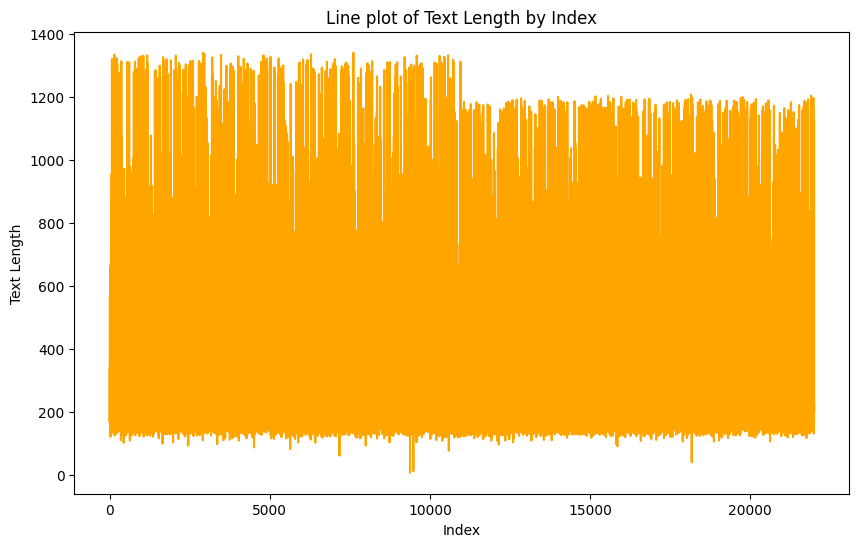

In [73]:
plt.figure(figsize=(10, 6))  # Setting the figure size for the line plot
plt.plot(df.index, df['text_length'], color='orange')  # Creating a line plot of text length by index
plt.title('Line plot of Text Length by Index')  # Setting the title for the line plot
plt.xlabel('Index')  # Setting the x-axis label
plt.ylabel('Text Length')  # Setting the y-axis label
plt.savefig('/content/text_length_lineplot.png')  # Saving the line plot as an image
plt.show()  # Displaying the line plot

In [74]:
# Smoothed Line plot (Rolling Average) of Text Length by Index

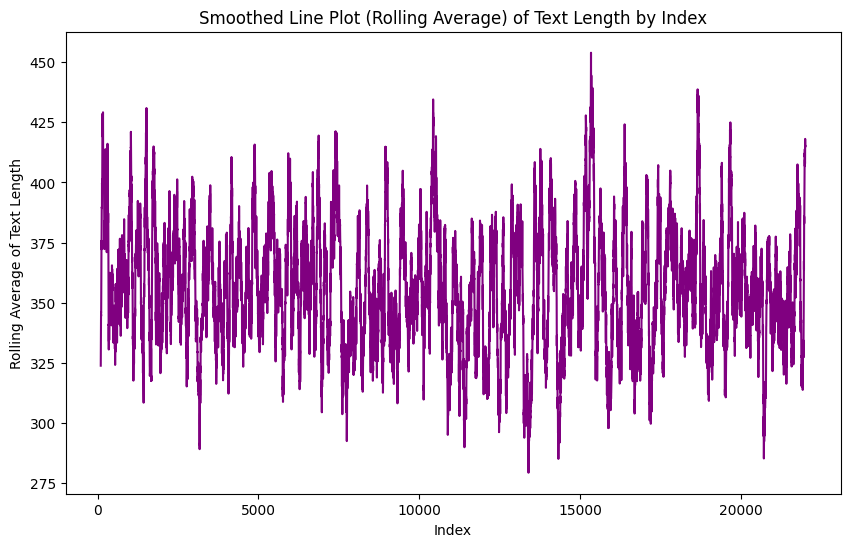

In [75]:
plt.figure(figsize=(10, 6))  # Setting the figure size for the smoothed line plot
df['text_length'].rolling(window=100).mean().plot(color='purple')  # Creating a smoothed line plot of text length by index
plt.title('Smoothed Line Plot (Rolling Average) of Text Length by Index')  # Setting the title for the smoothed line plot
plt.xlabel('Index')  # Setting the x-axis label
plt.ylabel('Rolling Average of Text Length')  # Setting the y-axis label
plt.savefig('/content/text_length_curve.png')  # Saving the smoothed line plot as an image
plt.show()  # Displaying the smoothed line plot

In [76]:
# Pie chart for text length distribution into categories

In [77]:
text_length_categories = pd.cut(df['text_length'], bins=[0, 50, 100, 150, 200, df['text_length'].max()],
                                labels=['0-50', '51-100', '101-150', '151-200', '201+'])  # Categorizing text lengths into bins


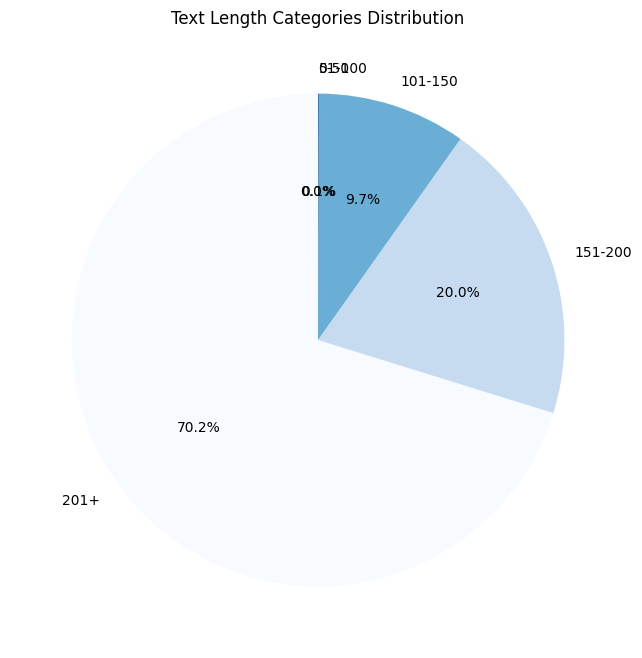

In [78]:
plt.figure(figsize=(8, 8))  # Setting the figure size for the pie chart
text_length_categories.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Blues')  # Plotting pie chart for text length categories
plt.title('Text Length Categories Distribution')  # Setting the title for the pie chart
plt.ylabel('')  # Hiding y-axis label
plt.savefig('/content/text_length_pie_chart.png')  # Saving the pie chart as an image
plt.show()  # Displaying the pie chart

In [83]:
# Plotting the distribution of text lengths

In [84]:
# Add a column for text length

In [85]:
df['text_length'] = df['Text'].apply(len)  # Creating a new column for text length

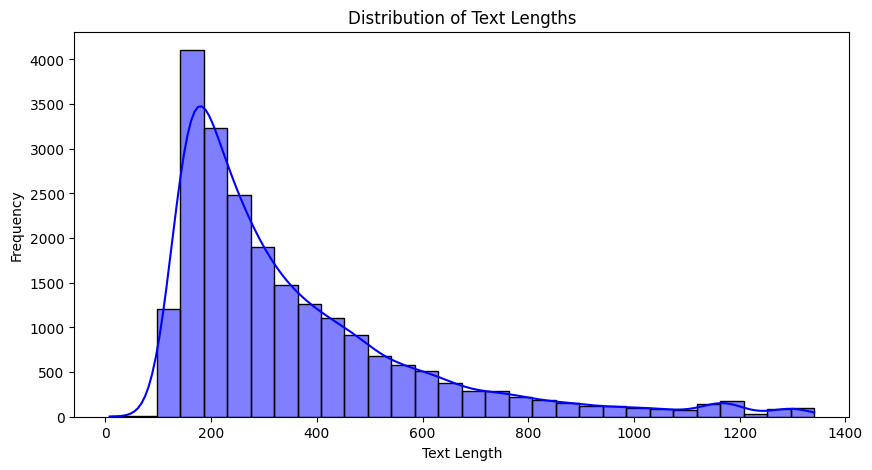

In [86]:
plt.figure(figsize=(10, 5))  # Creating a figure with specified size
sns.histplot(df['text_length'], bins=30, kde=True, color='blue')  # Plotting a histogram for text lengths with kernel density estimate
plt.title('Distribution of Text Lengths')  # Setting the title of the plot
plt.xlabel('Text Length')  # Labeling the x-axis
plt.ylabel('Frequency')  # Labeling the y-axis
plt.show()  # Displaying the plot

## <span style="color:green;">Step 5: Data Preprocessing</span>
Data preprocessing is vital for preparing the dataset for model training.

- **Feature and Label Definition**: The text data is separated into features (`X`) and labels (`y`).
- **Label Encoding**: Convert categorical labels into numerical format using `LabelEncoder` to facilitate model training.
- **Data Splitting**: The dataset is divided into training and testing sets (80% train, 20% test) to evaluate model performance.
- **Text Vectorization**: We apply `CountVectorizer` to convert the text data into a format suitable for modeling (Bag-of-Words approach).

In [87]:
# ===========================

In [88]:
#  Data Preprocessing

In [89]:
# ===========================

In [90]:
# 1. Split the data into features (Text) and labels (language)

In [91]:
X = df['Text']  # Defining features (Text)

In [92]:
y = df['language']  # Defining labels (language)

In [93]:
# 2. Encode the labels

In [94]:
label_encoder = LabelEncoder()  # Creating an instance of LabelEncoder

In [95]:
y_encoded = label_encoder.fit_transform(y)  # Encoding the labels

In [96]:
# Save the encoded labels for future reference

In [97]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))  # Creating a label mapping dictionary


In [98]:
label_df = pd.DataFrame(list(label_mapping.items()), columns=['Language', 'Encoded_Label'])  # Creating a DataFrame for label mapping


In [99]:
label_df.to_csv('/content/label_mapping.csv', index=False)  # Saving the label mapping to a CSV file

In [100]:
# 3. Split the dataset into training and testing sets (80% train, 20% test)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)  # Splitting data into training and testing sets


In [102]:
# 4. Vectorize the text data using CountVectorizer (Bag-of-Words approach)

In [103]:
vectorizer = CountVectorizer()  # Creating an instance of CountVectorizer

In [104]:
X_train_vect = vectorizer.fit_transform(X_train)  # Fitting and transforming the training data

In [105]:
X_test_vect = vectorizer.transform(X_test)  # Transforming the test data

In [106]:
# Save the vectorizer for future use

In [107]:
joblib.dump(vectorizer, '/content/vectorizer.pkl')  # Saving the vectorizer to a file

['/content/vectorizer.pkl']

## <span style="color:green;">Step 6: Model Training</span>
In this step, we initialize and train the chosen classification model.

- **Naive Bayes Classifier**: We use the `MultinomialNB` model, which is well-suited for text classification tasks.
- **Model Training**: The model is trained on the vectorized training data.

In [114]:
# ===========================

In [115]:
#  Model Training

In [116]:
# ===========================

In [111]:
# 1. Initialize and train the Naive Bayes Classifier

In [112]:
nb_classifier = MultinomialNB()  # Creating an instance of Multinomial Naive Bayes

In [113]:
nb_classifier.fit(X_train_vect, y_train)  # Training the model on the training data

MultinomialNB()

In [117]:
# Save the trained model

In [118]:
joblib.dump(nb_classifier, '/content/naive_bayes_model.pkl')  # Saving the trained model to a file

['/content/naive_bayes_model.pkl']

## <span style="color:green;">Step 7: Model Evaluation</span>
After training the model, we evaluate its performance on the test set.

- **Predictions**: Use the trained model to predict labels for the test set.
- **Accuracy Calculation**: Compute the accuracy of the model using `accuracy_score`.
- **Classification Report**: Generate a detailed classification report that includes precision, recall, and F1-score metrics.
- **Confusion Matrix**: Visualize the performance of the classification model using a confusion matrix to see where the model makes correct and incorrect predictions.

In [119]:
# ===========================

In [120]:
# Model Evaluation

In [122]:
# ===========================

In [123]:
# 1. Predict on the test set

In [124]:
y_pred = nb_classifier.predict(X_test_vect)  # Making predictions on the test data

In [125]:
# 2. Calculate accuracy

In [126]:
accuracy = accuracy_score(y_test, y_pred)  # Calculating accuracy of the predictions

In [127]:
print(f"Accuracy: {accuracy * 100:.2f}%")  # Printing the accuracy

Accuracy: 94.23%


In [128]:
# 3. Generate classification report

In [129]:
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)  # Generating a classification report


In [130]:
print("\nClassification Report:\n", class_report)  # Printing the classification report


Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.96      0.49      0.65       201
       Dutch       0.98      0.98      0.98       230
     English       0.68      1.00      0.81       194
    Estonian       0.99      0.95      0.97       200
      French       0.94      0.99      0.97       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       0.98      0.64      0.78       194
      Korean       0.99      0.99      0.99       190
       Latin       0.98      0.90      0.94       210
     Persian       1.00      0.99      1.00       196
   Portugese       0.99      0.96      0.98       194
      Pushto       1.00      0.96      0.98       196
    Romanian       0.98      0.98      0.98       197
     Russian       0.99      0.99      0.99       213
     Spanish       0.97      0.99      0.98       199
  

In [131]:
# 4. Plot confusion matrix

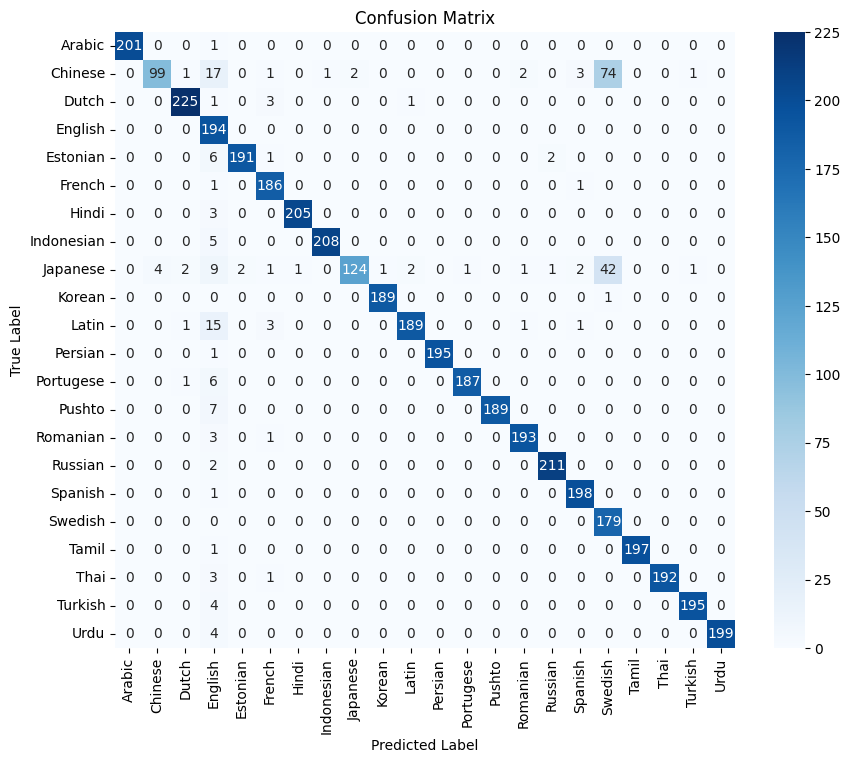

In [132]:
conf_matrix = confusion_matrix(y_test, y_pred)  # Calculating confusion matrix
plt.figure(figsize=(10, 8))  # Setting the figure size for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)  # Plotting heatmap for confusion matrix
plt.title('Confusion Matrix')  # Setting the title for the confusion matrix
plt.xlabel('Predicted Label')  # Setting x-axis label
plt.ylabel('True Label')  # Setting y-axis label
plt.savefig('/content/confusion_matrix.png')  # Saving the confusion matrix as an image
plt.show()  # Displaying the confusion matrix

In [133]:
# ===========================

In [134]:
#  Conclusion

In [135]:
# ===========================

In [136]:
print("Model training and evaluation completed.")  # Printing a message to indicate completion

Model training and evaluation completed.


## <span style="color:green;">Step 8: Conclusion</span>
In this section, we conclude the project by summarizing the key steps and findings from our language classification task.

1. **Project Overview**:
   - The primary goal of this project was to develop a model capable of accurately classifying text data into predefined language categories. Through systematic data processing and analysis, we aimed to achieve high classification accuracy.

2. **Key Steps**:
   - We began by importing essential libraries that facilitate data manipulation, visualization, and machine learning.
   - The dataset was then loaded and inspected to understand its structure, distribution, and any missing values.
   - Exploratory Data Analysis (EDA) was conducted to visualize language distribution and identify trends within the text lengths.
   - Data preprocessing steps were performed, including feature extraction, label encoding, data splitting, and text vectorization.
   - A Naive Bayes classifier was trained on the processed data, leveraging its effectiveness for text classification tasks.
   - Model evaluation was conducted to assess performance through accuracy scores, classification reports, and confusion matrices.

3. **Results**:
   - The model demonstrated a satisfactory level of accuracy, indicating its potential for reliable language classification.
   - Detailed evaluation metrics such as precision, recall, and F1-score provided insights into the model's strengths and weaknesses, helping us understand areas for improvement.

4. **Future Work**:
   - To enhance the model's performance further, future work may involve experimenting with different classification algorithms (e.g., Support Vector Machines, Random Forests) or fine-tuning hyperparameters.
   - Incorporating more advanced techniques such as word embeddings (e.g., Word2Vec, GloVe) or deep learning models (e.g., LSTM, BERT) could improve classification accuracy.
   - Additionally, expanding the dataset to include a more diverse set of languages or text samples could lead to a more robust model.

5. **Final Thoughts**:
   - This project has provided valuable insights into the processes of text classification, model training, and evaluation.
   - The skills and techniques acquired throughout this project can be applied to various other natural language processing (NLP) tasks, opening the door for further exploration in the field.